## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import scipy
import json
import seaborn as sns
from sklearn import metrics

In [2]:
df_train=pd.read_csv('train.tsv',delimiter='\t')

In [3]:
df_train.shape

(7395, 27)

In [4]:
df_train.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [6]:
df_train=df_train.replace("?",np.NaN)

In [7]:
df_train=df_train.replace(np.NaN,"0")
df_train.isnull().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
dtype: int64

In [8]:
df_test=pd.read_csv('test.tsv',delimiter='\t')

In [9]:
df_test.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,...,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,...,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,...,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,...,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,...,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


In [10]:
df_test=df_test.replace("?","0")
df_test.isnull().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
dtype: int64

## Text Preprocessing

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS,TfidfVectorizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression

In [12]:
 y_train = df_train.label.values

In [13]:
urlid_test = df_test.urlid

In [14]:
len_train = df_train.shape[0]
len_train

7395

In [15]:
text_train = df_train.boilerplate 
text_test = df_test.boilerplate

In [16]:
text_train_new = [i[9:-3] for i in text_train]
text_test_new = [i[9:-3] for i in text_test]

In [17]:
text_train_new[0]

'"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose Californ

In [18]:
# text_test_new[0]

In [19]:
text_train[0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

In [20]:
text = text_train_new + text_test_new

## Fitting the text data using TF-IDF

In [21]:
vect = TfidfVectorizer(stop_words='english',min_df=3,strip_accents='unicode',token_pattern=r'\w{1,}',ngram_range=(1,2),use_idf=True, smooth_idf=True, sublinear_tf=True)
vect.fit(text)
X= vect.transform(text)

In [22]:
X_train= X[:len_train]
X_test = X[len_train:]

In [23]:
corr=df_test[['alchemy_category_score','avglinksize','commonlinkratio_1','commonlinkratio_2','commonlinkratio_3','commonlinkratio_4',
               'compression_ratio','embed_ratio','framebased','frameTagRatio','hasDomainLink','html_ratio','image_ratio','is_news',
               'lengthyLinkDomain','linkwordscore','news_front_page','non_markup_alphanum_characters','numberOfLinks','numwords_in_url',
                'parametrizedLinkRatio']].corr()

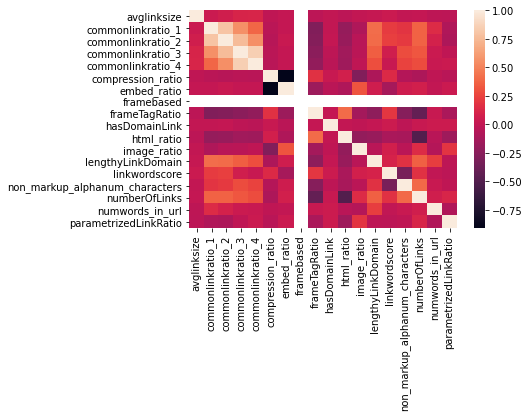

In [24]:
sns.heatmap(corr)

## Logistic Regression Classifier

In [25]:
x_train,x_test,Y_train,y_test=train_test_split(X_train,y_train,random_state=14)

In [26]:
lr = LogisticRegression(penalty='l2',C=1,max_iter=10000,dual=False)
print('Cross Val Score: {:.2f}'.format(np.mean(cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc'))))
lr.fit(X_train,y_train)
# Predicting 
y_pred = lr.predict(X_test)
print('Y predicted')
data = {'urlid':urlid_test,'label':y_pred}

Cross Val Score: 0.88
Y predicted


In [27]:
ycheck=lr.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

## Metrics calculation - precision, recall and accuracy

In [29]:
print(classification_report(y_test,ycheck))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       938
           1       0.91      0.83      0.87       911

    accuracy                           0.87      1849
   macro avg       0.88      0.87      0.87      1849
weighted avg       0.88      0.87      0.87      1849



In [30]:
submission_df =pd.DataFrame(data)
submission_df.to_csv('Submission.csv',index=False)
print('File Submitted')

File Submitted
